# 1. Preprocessing

Importing and loading the data

In [1]:
import pandas as pd

dataset = pd.read_csv("income.csv")
print("dataset length:", len(dataset))
dataset.head()

dataset length: 26215


,income,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week
0,0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,40
1,0,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13
2,0,38,Private,HS-grad,Separated,Handlers-cleaners,Not-in-family,White,Male,40
3,0,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40
4,0,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40


Checking for missing values

In [2]:
dataset.isna().sum()

,0
income,0
age,0
workclass,1396
education,0
marital-status,0
occupation,1401
relationship,0
race,0
sex,0
hours-per-week,0


Dropping rows with missing values

In [3]:
dataset = dataset.dropna()
print("dataset length:", len(dataset))

dataset length: 24814


Checking for duplicates

In [4]:
dataset.duplicated().any()

np.True_

Removing duplicates


In [5]:
dataset = dataset.drop_duplicates()
print("dataset length:", len(dataset))

dataset length: 21537


Checking for variable data types

In [6]:
dataset.dtypes

,0
income,int64
age,int64
workclass,object
education,object
marital-status,object
occupation,object
relationship,object
race,object
sex,object
hours-per-week,int64


Checking Value Count


In [7]:
print(dataset["workclass"].value_counts(), "\n")
print(dataset["education"].value_counts(), "\n")
print(dataset["marital-status"].value_counts(), "\n")
print(dataset["occupation"].value_counts(), "\n")
print(dataset["relationship"].value_counts(), "\n")
print(dataset["race"].value_counts(), "\n")
print(dataset["sex"].value_counts(), "\n")
print(dataset["income"].value_counts(), "\n")

workclass
Private             15108
Self-emp-not-inc     1999
Local-gov            1656
State-gov            1021
Self-emp-inc          951
Federal-gov           793
Without-pay             9
Name: count, dtype: int64 

education
HS-grad         6442
Some-college    4668
Bachelors       3701
Masters         1324
Assoc-voc       1007
Assoc-acdm       814
11th             718
10th             592
Prof-school      487
7th-8th          427
Doctorate        356
9th              355
12th             296
5th-6th          212
1st-4th          104
Preschool         34
Name: count, dtype: int64 

marital-status
Married       10291
NotMarried     6752
Separated      3848
Widowed         646
Name: count, dtype: int64 

occupation
Prof-specialty       3212
Exec-managerial      3017
Sales                2597
Adm-clerical         2589
Craft-repair         2489
Other-service        2244
Machine-op-inspct    1302
Transport-moving     1136
Handlers-cleaners     862
Farming-fishing       752
Tech-support

 **Encode Categoricval Variables**
We will do the following


1.   Binary Variables: Sex
              

*   Male = 0
*   Female = 1


2.   Ordinal Variable: Education


Preschool=1; 1st-4th= 2; 5th-6th=3; 7th-8th=4; 9th=5; 10th=6; 11th=7; 12th=8; HS-grad=9; some-college=10; assoc-voc=12; Bachelors=13; Masyers=14; prof-school=15; doactorate=16



3.   Other categorical variables : workclass, marital-status, occcupation, relationship, race
For this we will be doing one hot encoding


In [8]:
#Binary variable
dataset['sex'] = dataset['sex'].replace({'Male': 0, 'Female': 1})


#Ordinal variable
dataset['education'] = dataset['education'].replace({ 'Preschool': 1,'1st-4th': 2,'5th-6th': 3,'7th-8th': 4,'9th': 5,'10th': 6,'11th': 7,'12th': 8,'HS-grad': 9,'Some-college': 10,'Assoc-voc': 11,'Assoc-acdm': 12,'Bachelors': 13,'Masters': 14,'Prof-school': 15,'Doctorate': 16})


#one hot encoding

dataset = pd.get_dummies(dataset, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race'])
dataset.head()

/tmp/ipython-input-5644734.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['sex'] = dataset['sex'].replace({'Male': 0, 'Female': 1})
/tmp/ipython-input-5644734.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['education'] = dataset['education'].replace({ 'Preschool': 1,'1st-4th': 2,'5th-6th': 3,'7th-8th': 4,'9th': 5,'10th': 6,'11th': 7,'12th': 8,'HS-grad': 9,'Some-college': 10,'Assoc-voc': 11,'Assoc-acdm': 12,'Bachelors': 13,'Masters': 14,'Prof-school': 15,'Doctorate': 16})


,income,age,education,sex,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,39,13,0,40,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0,50,13,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0,38,9,0,40,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0,53,7,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,28,13,1,40,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


Checking Dataset shape

In [9]:
dataset.shape

(21537, 41)

Creating Input and target varioables

In [10]:
array = dataset.values
X = array[:, 1:]
y = array[:, 0].astype('int')

**Splitting the dataset for normalization**

our testing size in 10% and random state will be 1

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

Applying it on both train and test dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

# **2. Building Model (Logistic Regression and SVC)**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# logistic regression (LR)
model = LogisticRegression(solver="liblinear")
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of LR:", test_score)

# Support Vector Machine (SVM)
model = SVC()
model.fit(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print("Testing Accuracy of SVC:", test_score)

Testing Accuracy of LR: 0.7887650882079852
Testing Accuracy of SVC: 0.7934076137418756


10-fold Cross validation

In [14]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=2)

Checking average accuracy based on 10 fold cross validation

In [15]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver="liblinear")
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of LR:",results.mean())

model = SVC()
results = cross_val_score(model, X_train_norm, y_train, cv=kfold)
print("Average Accuracy of SVC:",results.mean())

Average Accuracy of LR: 0.8083361674519705
Average Accuracy of SVC: 0.8004943873806409


Optimizing Logiostic Regression

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10],
    'solver': ['saga', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold).fit(X_train_norm, y_train)
print("Best average accuracy of LR:", gs_lr_result.best_score_)

Best average accuracy of LR: 0.808490992825023


Evaluating with testing dataset

In [17]:
test_accuracy = gs_lr_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7883008356545961


Cheking parameter for best selected model

In [23]:
gs_lr_result.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Optimizing for SVM

In [19]:
from sklearn.model_selection import GridSearchCV

grid_params_svc = {
    'kernel': ['linear','rbf','poly'],
    'C': [1, 10],
    'degree': [3, 5],
    'gamma': ['auto','scale']
}

svc = SVC()
gs_svc_result = GridSearchCV(svc, grid_params_svc, cv=kfold).fit(X_train_norm, y_train)
print(gs_svc_result.best_score_)

0.8085940589422164


Evaluating with testing dataset

In [20]:
test_accuracy = gs_svc_result.best_estimator_.score(X_test_norm, y_test)
print("Accuracy in testing:", test_accuracy)

Accuracy in testing: 0.7934076137418756


Checking parameter for best seleected model

In [21]:

gs_svc_result.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

# 3. K-mean Clustering

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_norm)


Number of samples for each clustering

In [46]:
import numpy as np

kmeans_labels = kmeans.labels_
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
print("Number of data samples in each cluster:", dict(zip(unique_labels, unique_counts)))

Number of data samples in each cluster: {np.int32(0): np.int64(9222), np.int32(1): np.int64(10161)}


Extracting prototype for each clusters

In [47]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X_train_norm)

display(dataset.iloc[closest, :])

,income,age,education,sex,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
11540,0,28,9,1,32,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
6945,0,56,10,0,45,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Checking the accuracy

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans_labels = kmeans.labels_

acc_1 = accuracy_score(y, kmeans_labels)
acc_2 = accuracy_score(y, 1 - kmeans_labels)

accuracy = max(acc_1, acc_2)

print("k means prediction accuracy:", accuracy)


k means prediction accuracy: 0.6295677206667595


Checking for optimum number of clusters

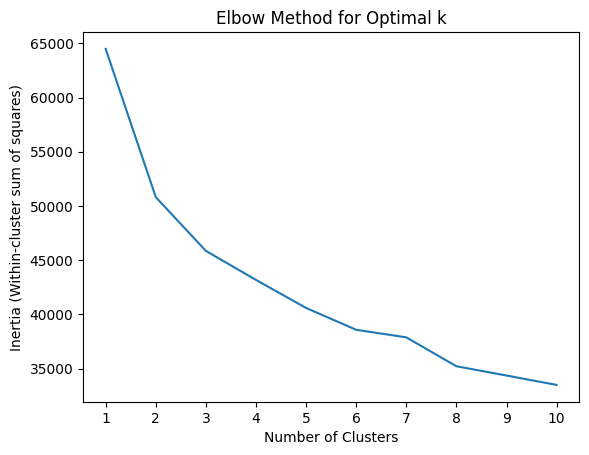

In [39]:
import matplotlib.pyplot as plt

num_cluster = range(1, 11)
scores = []

for i in num_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X_train_norm)
    scores.append(kmeans.inertia_)

plt.plot(num_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(num_cluster)
plt.show()